### Baseball Case Study   

#### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
#### -- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

#### -- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
For downloading the dataset, use the link given below. 

#### Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv


In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
#read data from github link

#train dataset
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')#, names=columns )
data.sample(7)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77


In [3]:
data.shape

(30, 17)

#### Rows : 30 and Columns : 17

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#### ERA column is in Float64 dtype and rest of the columns are int64 dtype

#### Check for null values

In [5]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### Observation : 
NO null Values in data set

In [6]:
for column in data:
    print(data[column].value_counts())
    


68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1
1379 

#### #Observations :  
#### 1. from above value count it is clear that the dataset is not having any Null values
#### 2. also the column 'W' is our Label and the data contained in this column is continious data so, our problem is related to Regression Problem

### # EDA

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Observation:
1. All the 50% values are almost equal to mean, so data seems to be distributed around the mean
2. The Columns "CG" and "ER" look likes having categorical data

#### # converting all the columns to 'float64'

In [8]:
for column in data:
    data[column]= data[column].astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     float64
 1   R       30 non-null     float64
 2   AB      30 non-null     float64
 3   H       30 non-null     float64
 4   2B      30 non-null     float64
 5   3B      30 non-null     float64
 6   HR      30 non-null     float64
 7   BB      30 non-null     float64
 8   SO      30 non-null     float64
 9   SB      30 non-null     float64
 10  RA      30 non-null     float64
 11  ER      30 non-null     float64
 12  ERA     30 non-null     float64
 13  CG      30 non-null     float64
 14  SHO     30 non-null     float64
 15  SV      30 non-null     float64
 16  E       30 non-null     float64
dtypes: float64(17)
memory usage: 4.1 KB


Now all the columns are having same data type as 'float64'

#### # Distribution Plot

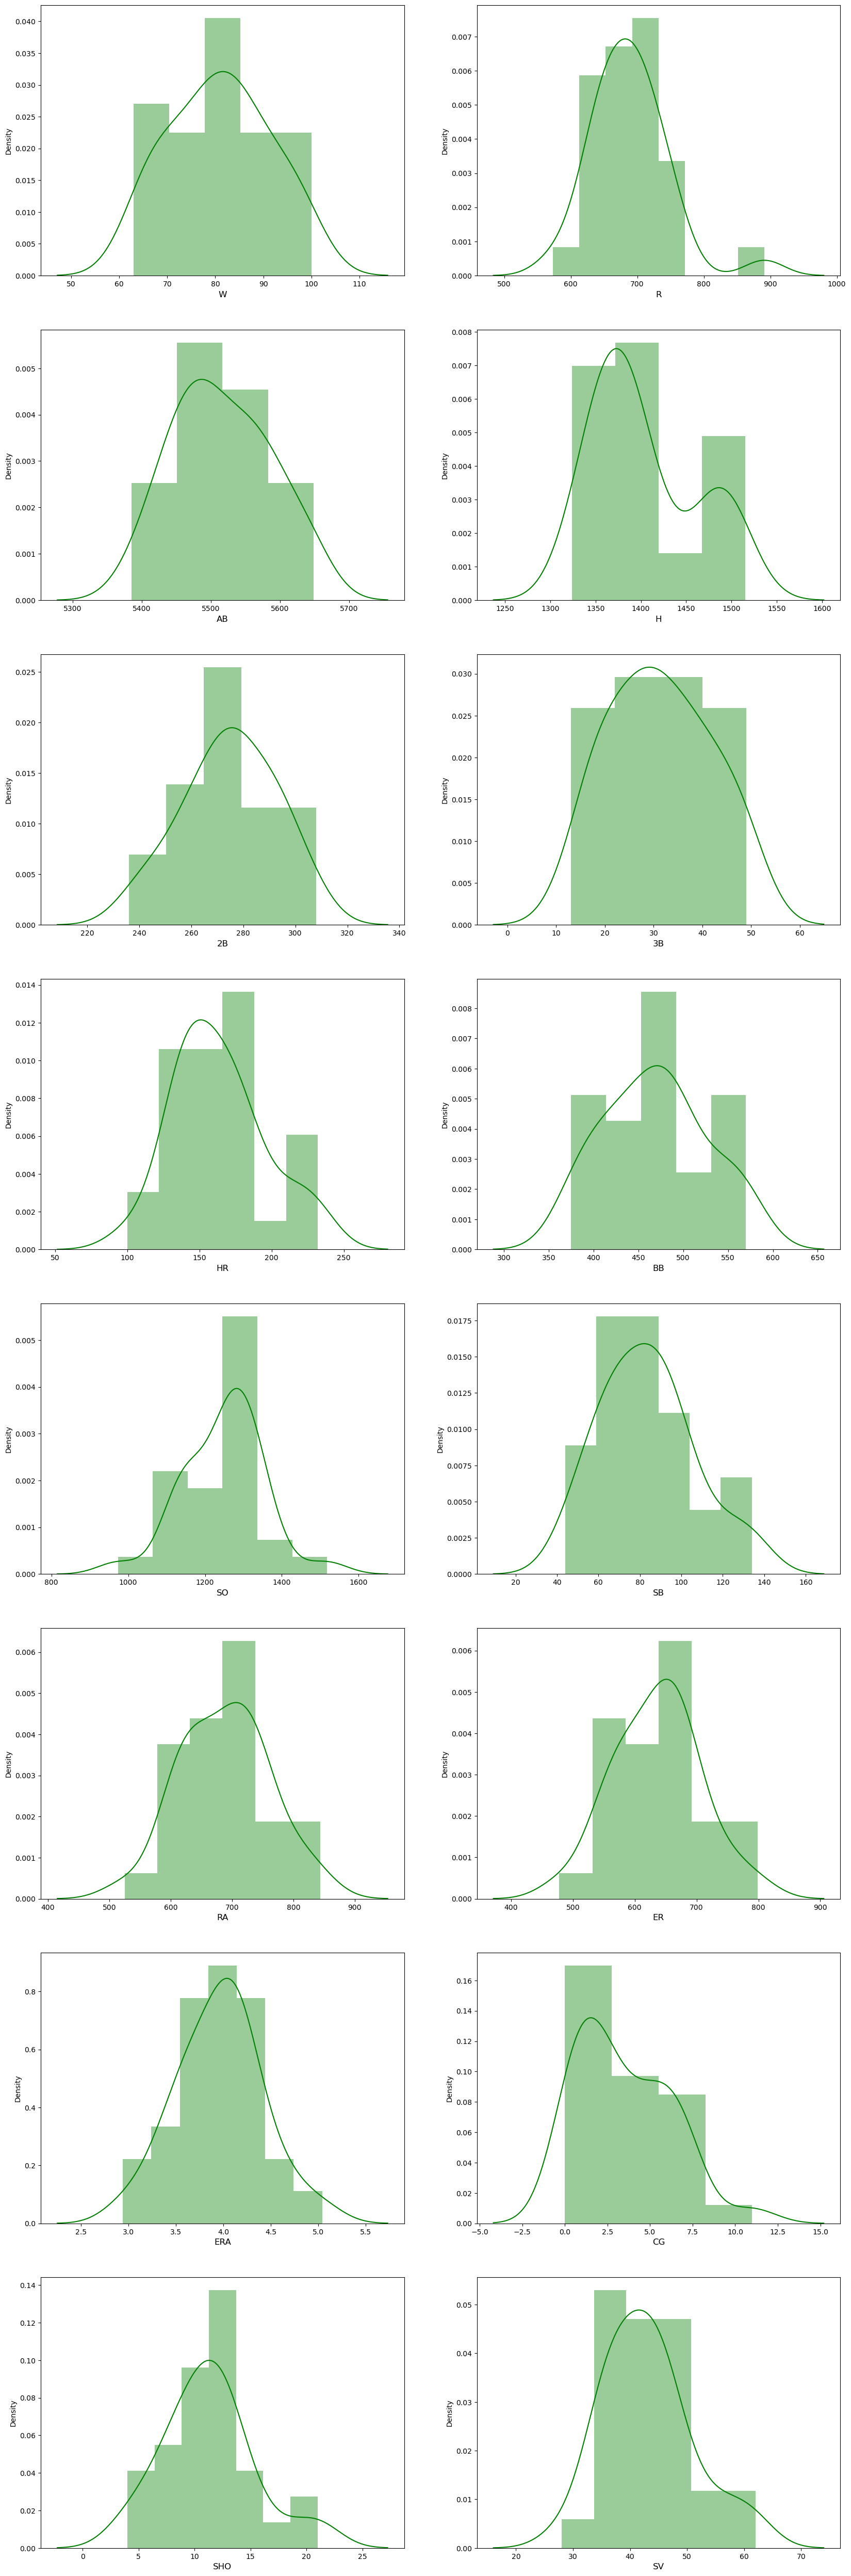

In [10]:
plt.figure(figsize=(20,64))
plotno=1
for column in data:
    if plotno<=16:
        plt.subplot(8,2,plotno)
        sns.distplot(data[column], color='g')
        plt.xlabel(column, fontsize=12)
    plotno+=1
plt.show()
        

#### # Count Plot

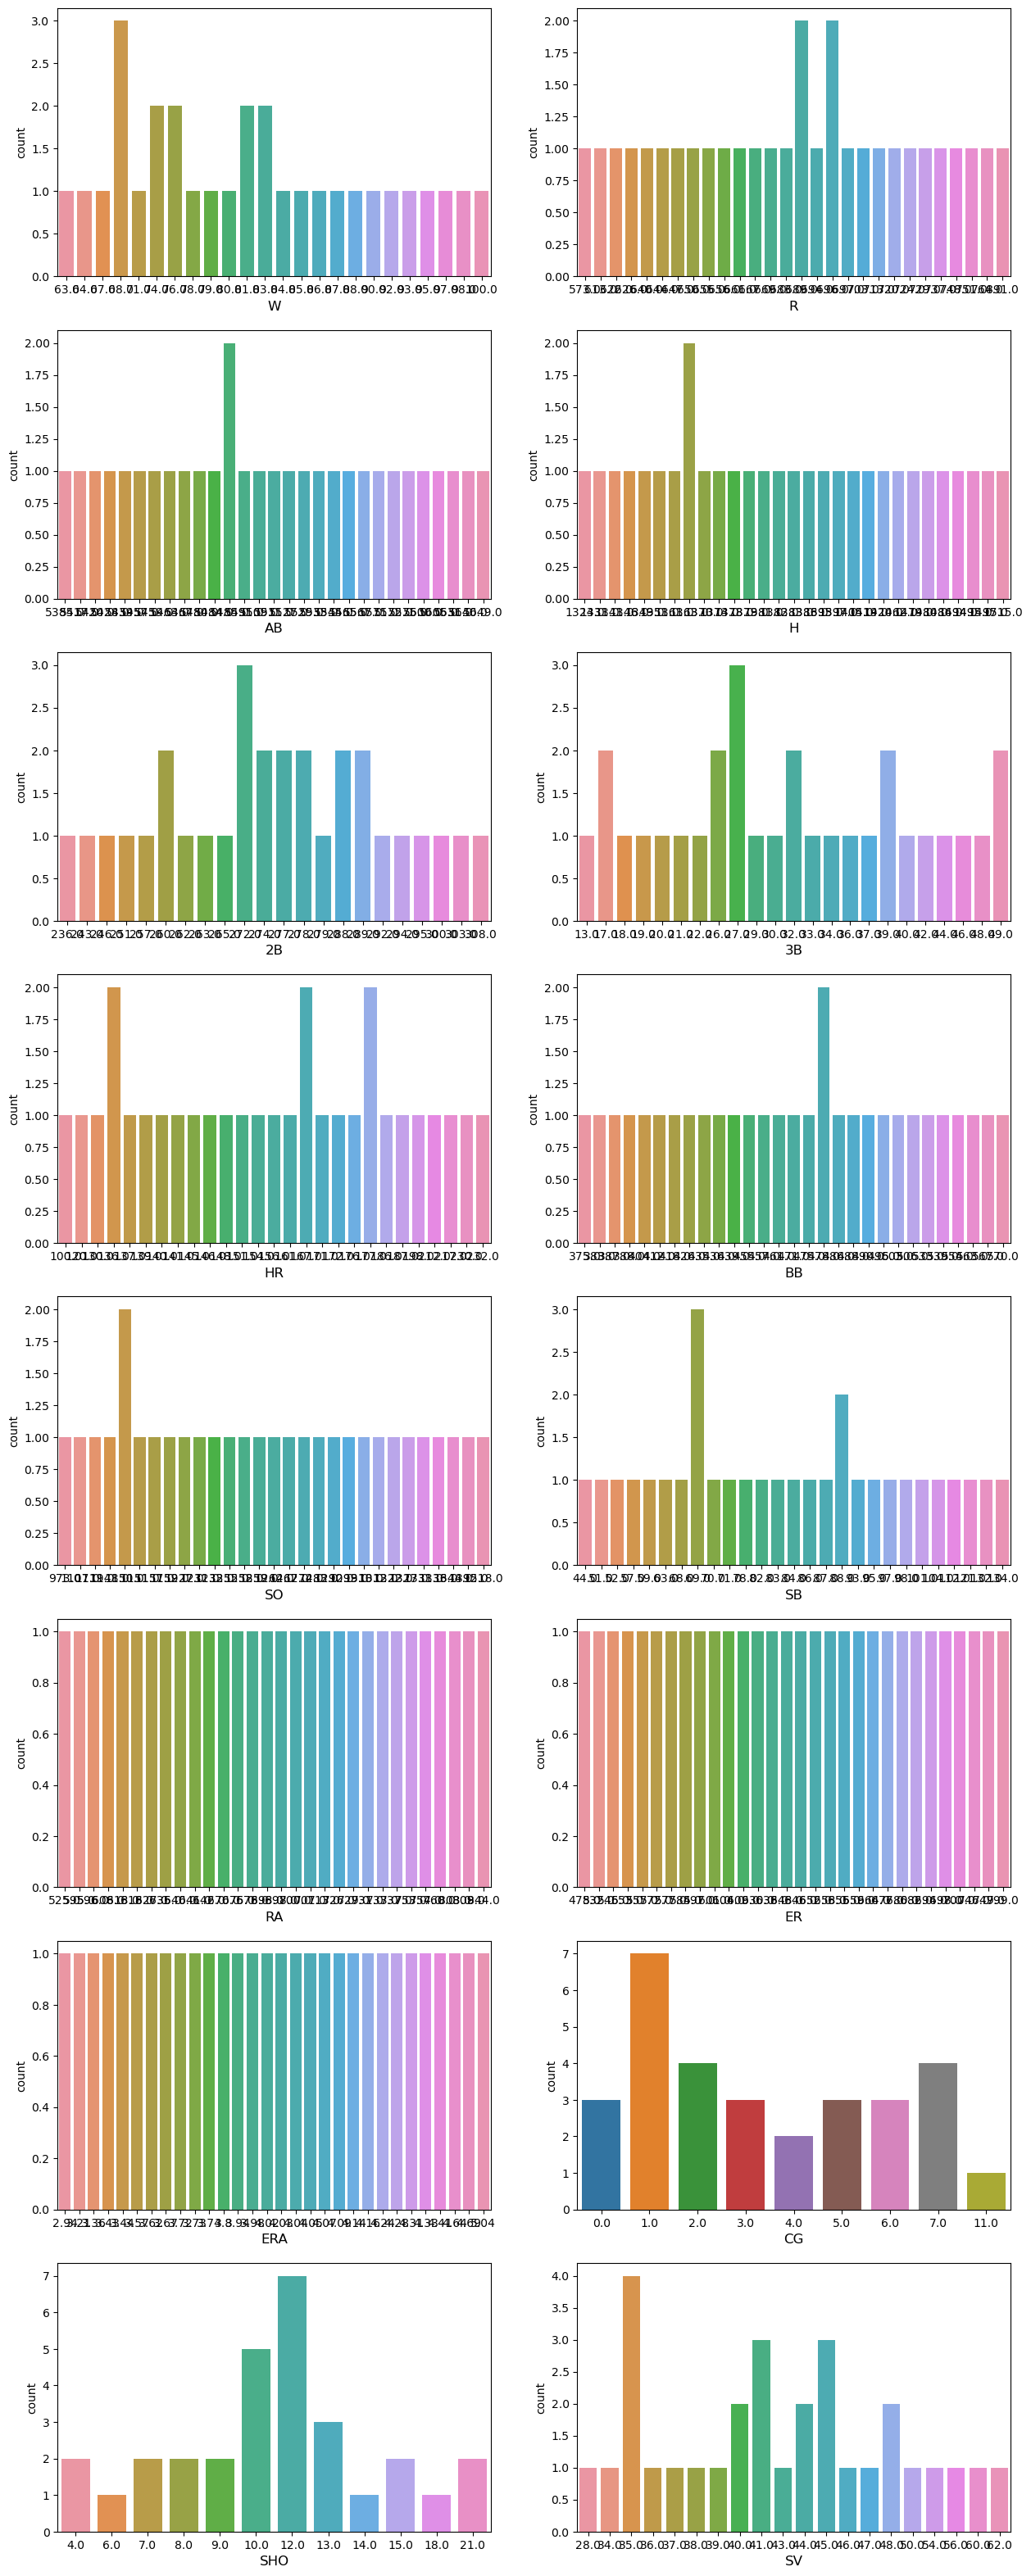

In [11]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=16:
        plt.subplot(8,2,pltno)
        sns.countplot(data[column])
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Pair Plot

Columns analysis compared to the Target column

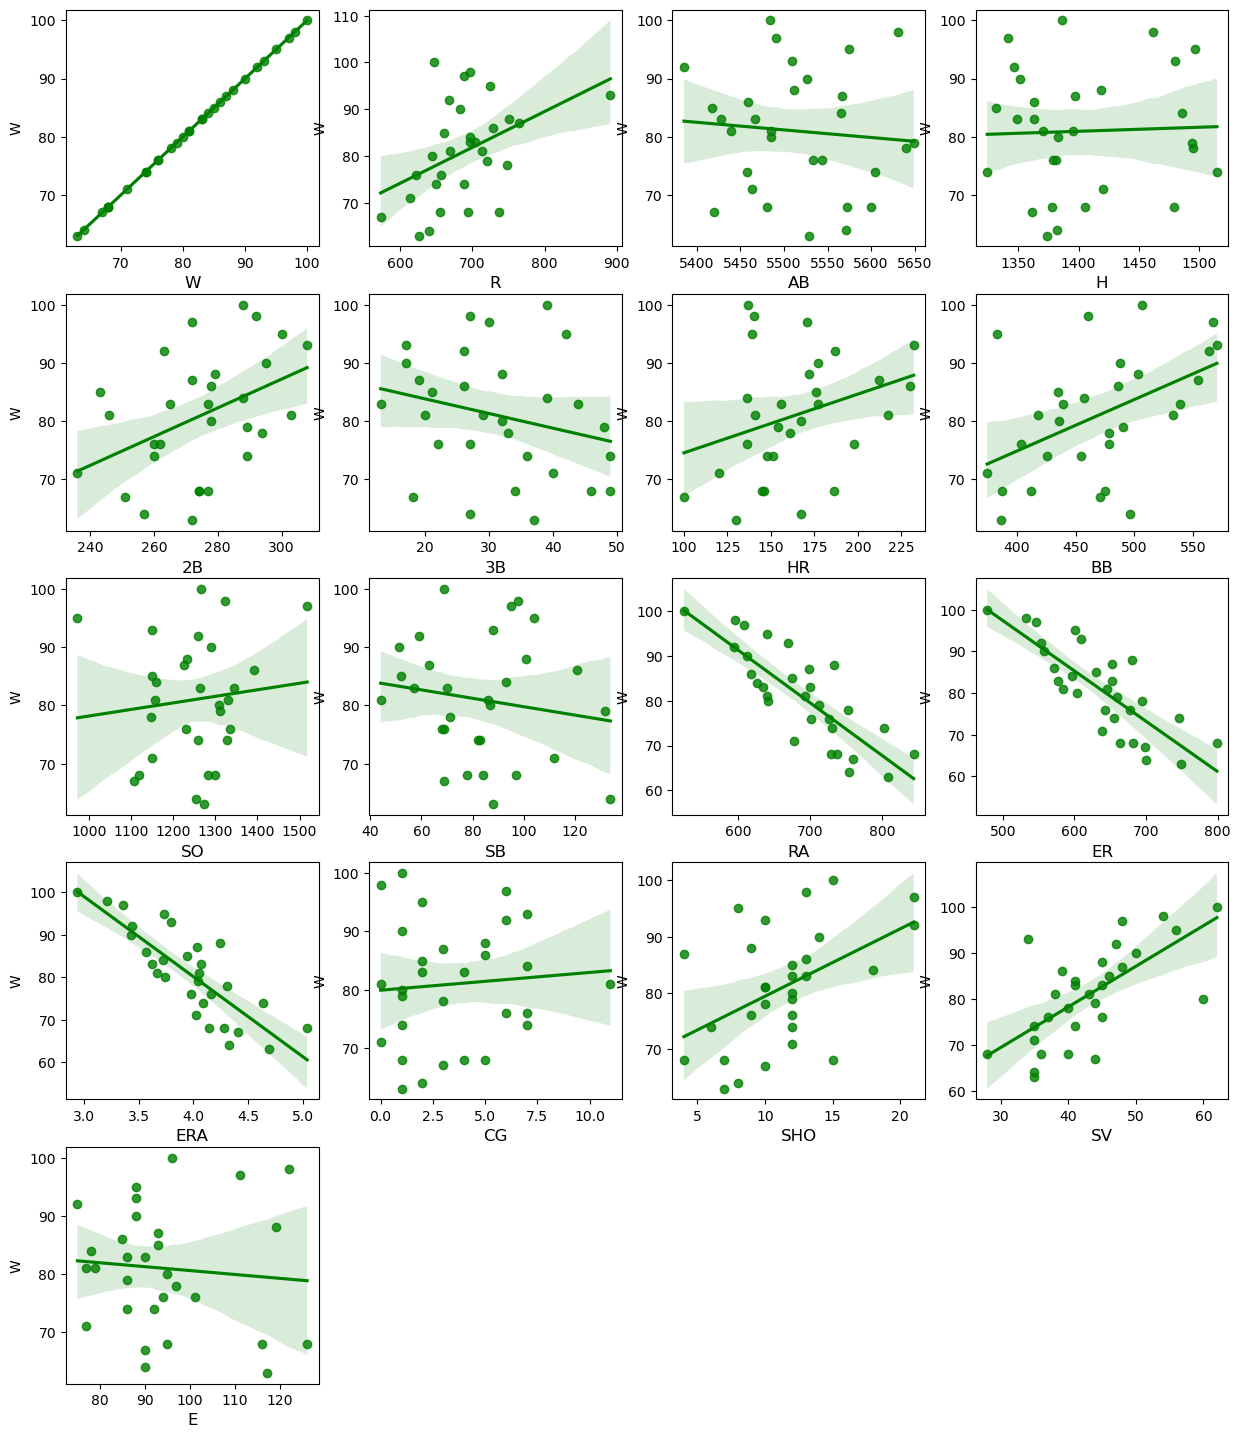

In [23]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=41:
        plt.subplot(11,4,pltno)
        sns.regplot(x=data[column], y=data['W'], color='g')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

Observations :
1. columns 'RA', 'ER','3B' and 'ERA' are having Negative relation with target column 'W'
2. columns 'R', '2b','HR','BB','SHO' and 'SV' are having Positive relation with target column 'W'

#### # Box Plot

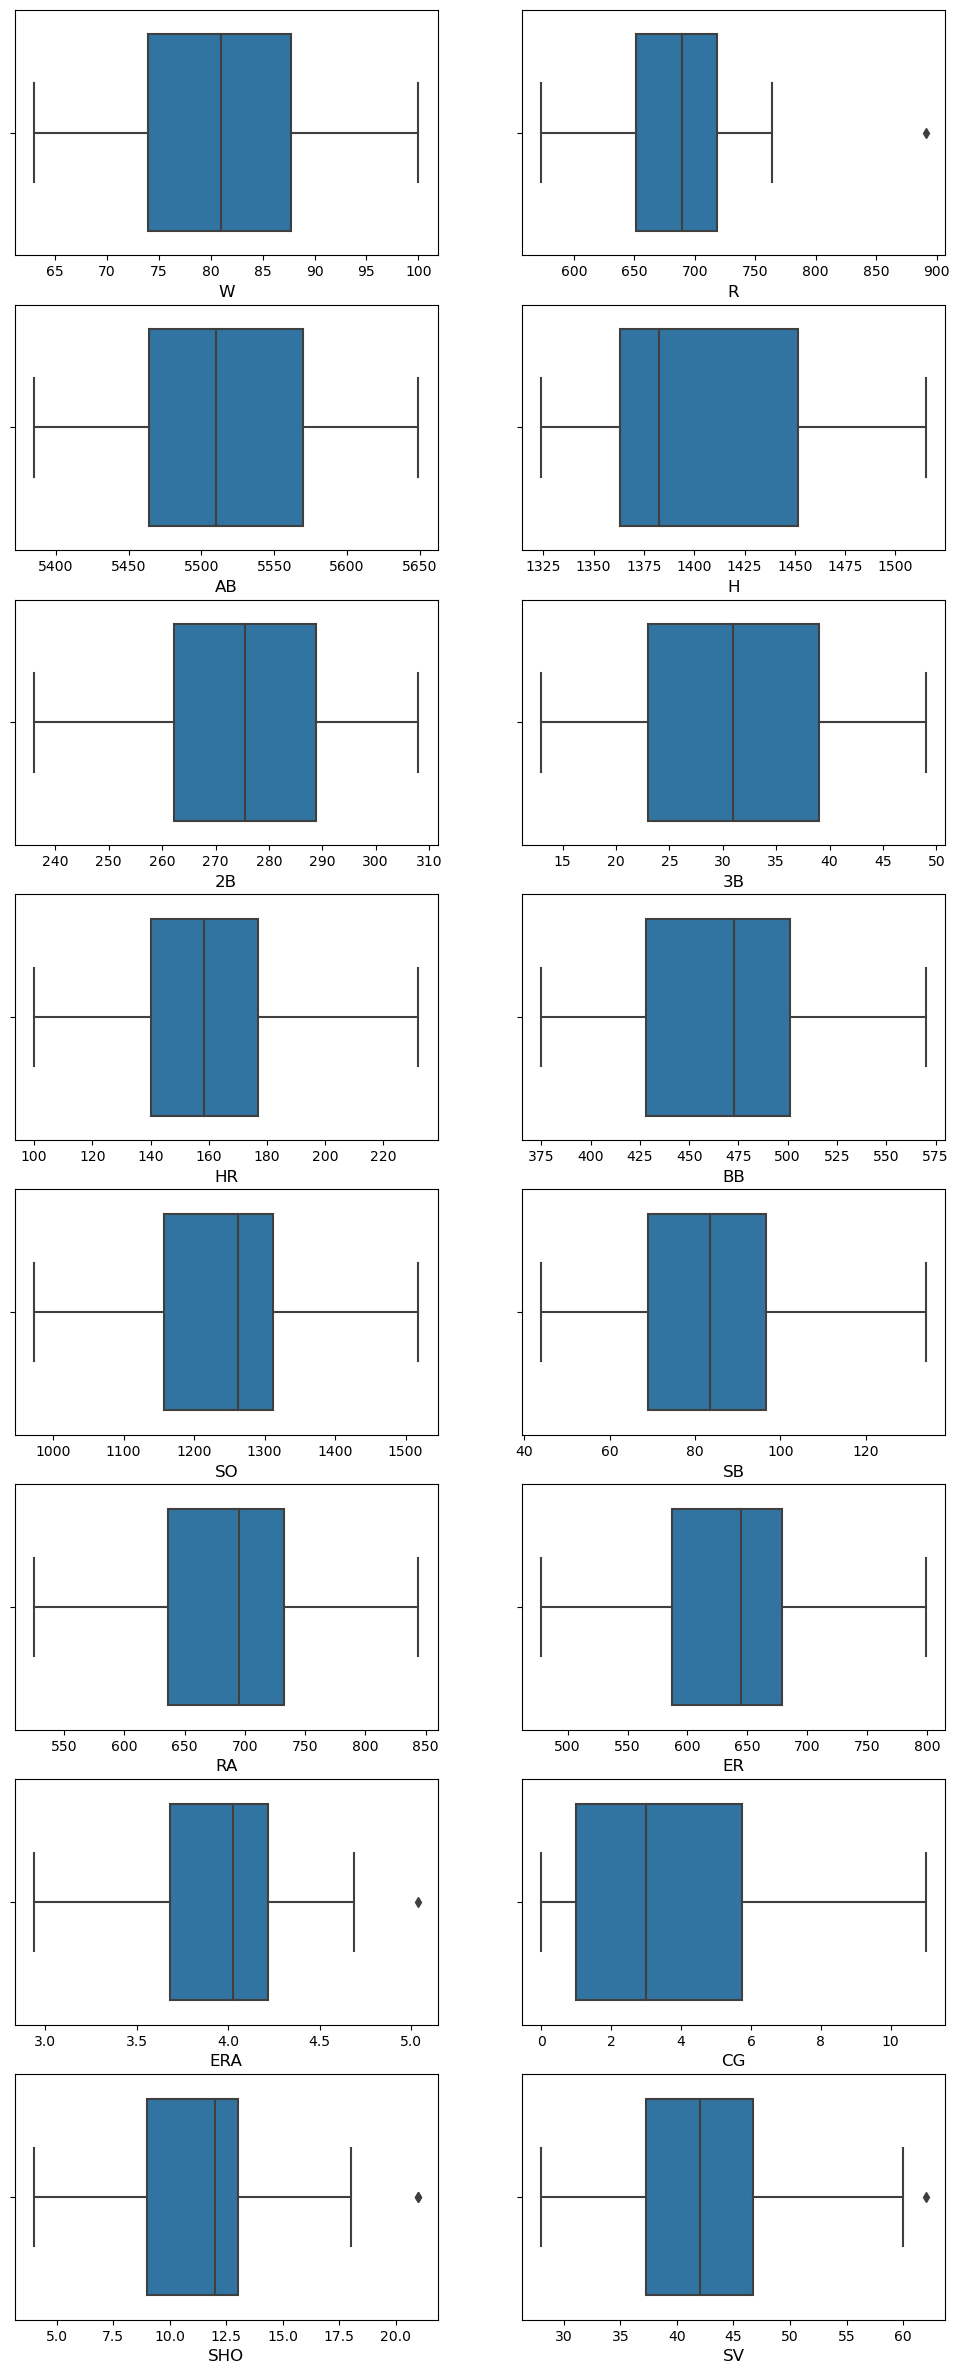

In [29]:
plt.figure(figsize=(12,30))
pltno=1
for column in data:
    if pltno<=16:
        plt.subplot(8,2,pltno)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

Observations:  
1. Outliers seen in columns 'R', 'ERA', 'SHO' and 'SV'

#### # Skewness

In [30]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### # Observation:  
Not very much skewness seen in data

So keeping the data as it is

### # Corelation heat map

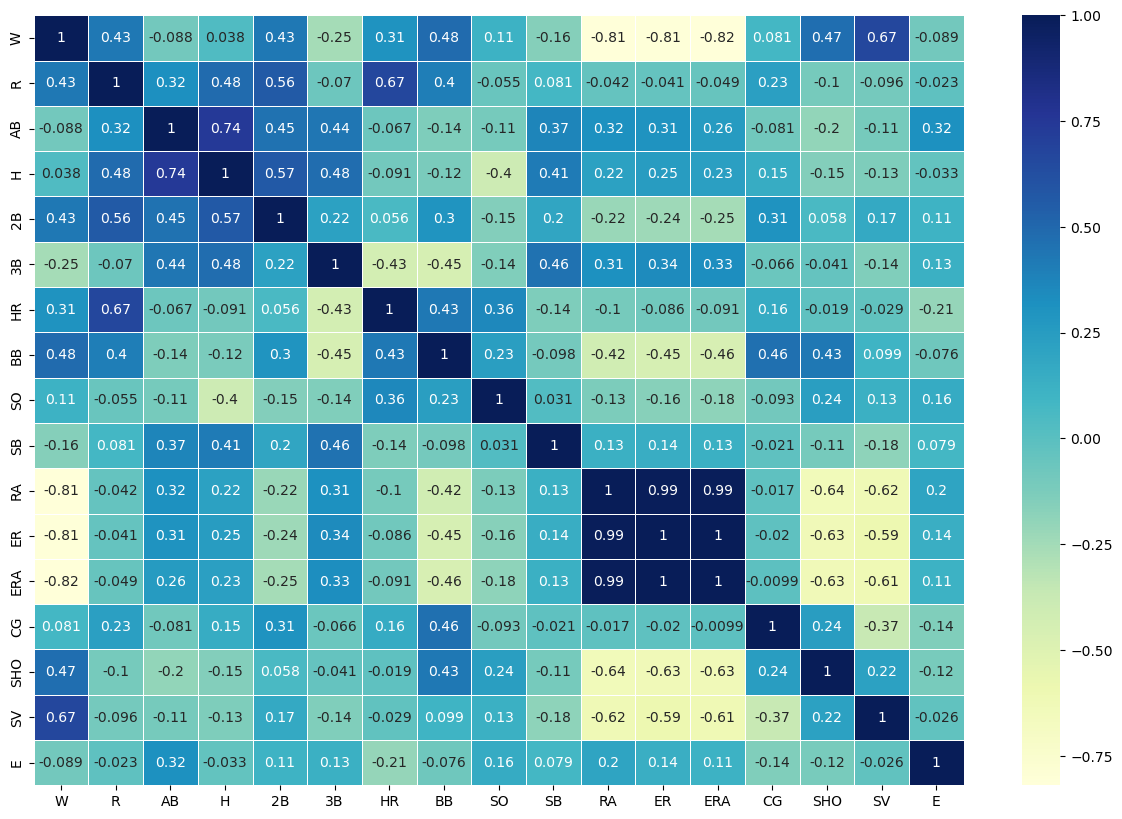

In [44]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

#### Observations:
1. Highly positive corelation 99% seen between 'RA' with 'ER' and 'ERA' columns
2. Also Highly positive corelation 100% seen between 'ER' with 'ERA' column

#### #Dropping columns 'ERA' and 'RA' as this columns are derived from other data like 'RA' is from 'Runs' and 'ERA' from 'Earned Runs'


In [67]:
data=data.drop(['RA','ERA'], axis=1)

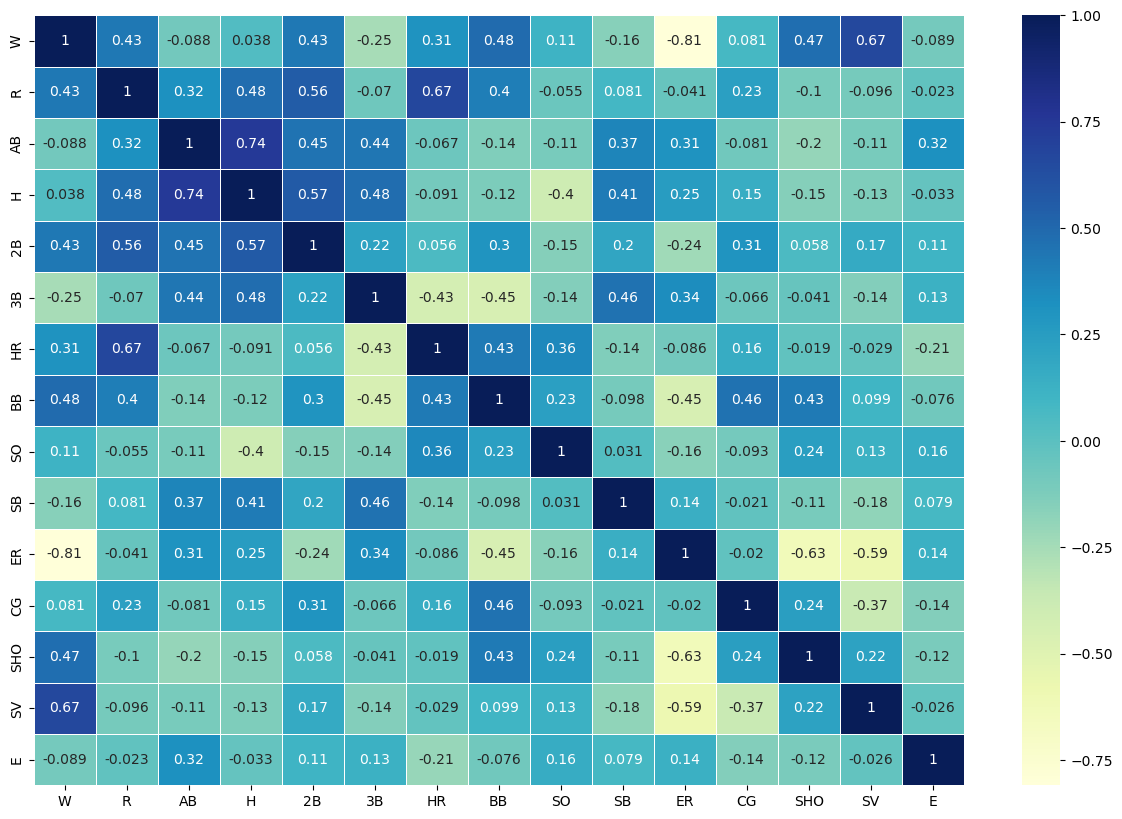

In [68]:
# again plotting corelation heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

### # Model bulding

#### Splitting label and features

In [71]:
X=data.drop(['W'], axis=1)
y=data['W']
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,601,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,653,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,584,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,643,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,746,7,12,35,86


#### #standardising the data via Standard Scaler

In [72]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.tail()

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
25,-0.367523,-1.894646,-1.024080,-0.659500,-0.515731,0.746815,1.673953,0.096064,-1.092202,-1.201147,0.932393,2.394514,0.508375,-1.408697
26,0.134432,0.703396,1.467888,0.745685,0.749270,-0.883181,-0.215706,-0.874377,0.423507,-0.563113,1.300442,1.653943,-0.267112,-1.190106
27,0.549843,1.915815,1.610286,0.801892,1.625040,-0.307888,0.372584,0.625395,2.162114,0.335934,-0.907856,0.172800,0.120631,-0.607197
28,-0.661773,-0.855429,-1.415675,-0.828122,0.457346,-0.499652,-0.768343,0.772432,-0.066870,0.277931,-0.907856,-1.308343,-0.267112,-0.170015
29,0.844092,0.804431,1.343289,-0.041219,1.722347,0.714854,-1.445768,0.341125,0.601826,2.366042,0.196293,-1.802057,-0.913352,0.048576


#### # Test train split

In [73]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [74]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train,y_train)
    gb_pred=gb.predict(x_test)
    acc=r2_score(y_test,gb_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)

Max R2 Score is :   0.8297650246666657 And @ Random State :   273


In [75]:
x_train,x_test,y_train,y_test=train_test_split(X ,y ,test_size=0.25, random_state = maxrs)

In [76]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   99.99999541142294  %
R2 Score on test data :   82.4295745479133  %
Mean Absolute Error :   3.2758785355518096
Mean Squared Error :   12.845628232861515
Root Mean Squared Error :   3.584079830704321


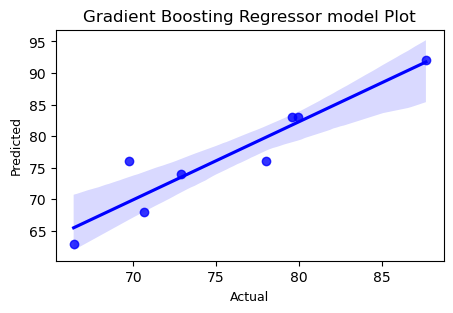

In [78]:
plt.figure(figsize=(5,3))
sns.regplot(x=gb_pred_test, y=y_test, color='b')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Gradient Boosting Regressor model Plot', fontsize=12)
plt.show()

In [79]:
# importing more libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [80]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   96.46509966406937  %
R2 Score on test data :   63.97286348740403  %
Mean Absolute Error :   4.034969236551725
Mean Squared Error :   26.339214334755706
Root Mean Squared Error :   5.132174425597371


In [81]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   58.81496062992125  %
R2 Score on test data :   52.70100448813848  %
Mean Absolute Error :   4.200000000000003
Mean Squared Error :   34.58000000000001
Root Mean Squared Error :   5.880476171195664


In [82]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   91.43290884312538  %
R2 Score on test data :   81.9845949989314  %
Mean Absolute Error :   3.0775000000000006
Mean Squared Error :   13.170949999999994
Root Mean Squared Error :   3.6291803482329166


In [83]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   75.72016242786923  %
Mean Absolute Error :   3.376249999999999
Mean Squared Error :   17.75083749999999
Root Mean Squared Error :   4.213174278379662


In [84]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   41.525967086984394  %
Mean Absolute Error :   6.25
Mean Squared Error :   42.75
Root Mean Squared Error :   6.5383484153110105


In [85]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   94.74842536739877  %
R2 Score on test data :   79.05581728680691  %
Mean Absolute Error :   3.3494562100214873
Mean Squared Error :   15.312161080473505
Root Mean Squared Error :   3.9130756548364234


In [86]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   18.487594099732462  %
R2 Score on test data :   -22.641238357765083  %
Mean Absolute Error :   7.696736018916596
Mean Squared Error :   89.66224285562231
Root Mean Squared Error :   9.469014883060556


### # Cross Validation Score

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [89]:
#Linear Regression Model
score1=cross_val_score(ln,X,y,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [ 0.76556097  0.82190768  0.90391411  0.75382368 -0.03288128]
Avg Score :  0.642465033536053
Difference between CV score and R2 Score is  :  -0.27363986620126957 %


In [103]:
# KNN Model
score2=cross_val_score(knn,X,y,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.5949335  0.51986978 0.39227991 0.49231774 0.60615217]
Avg Score :  0.5211106200086204
Difference between CV score and R2 Score is  :  0.5899424872764403 %


In [102]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.58052426 0.45893098 0.2022123  0.71464527 0.38920995]
Avg Score :  0.4691045505363835
Difference between CV score and R2 Score is  :  35.074139945293055 %


In [101]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.60553173 0.62606381 0.32788047 0.81190686 0.45520082]
Avg Score :  0.5653167364969846
Difference between CV score and R2 Score is  :  19.188488778170765 %


In [100]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [ 0.48068398  0.6527401  -0.67607223  0.20130577  0.27282609]
Avg Score :  0.1862967388398687
Difference between CV score and R2 Score is  :  22.896293202997526 %


In [99]:
# Ridge model
score6=cross_val_score(Ri,X,y,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.73164402 0.81902266 0.83165237 0.85431996 0.43332484]
Avg Score :  0.7339927695587306
Difference between CV score and R2 Score is  :  5.656540330933857 %


In [98]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.6114016  0.57898432 0.07640142 0.38634547 0.31974698]
Avg Score :  0.3945759574489345
Difference between CV score and R2 Score is  :  42.97197880301985 %


In [97]:
# SVR model
score8=cross_val_score(svr,X,y,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.06992787 0.08597766 0.04511461 0.13839139 0.12276621]
Avg Score :  0.09243554882068832
Difference between CV score and R2 Score is  :  -31.884793239833915 %


#### So our best performing model is Random Forest Regressor Model ,
R2 Score on Train data :   96.46509966406937  %  
R2 Score on test data :   63.97286348740403  %  
Mean Absolute Error :   4.034969236551725  
Mean Squared Error :   26.339214334755706  
Root Mean Squared Error :   5.132174425597371  

Avg Score :  0.642465033536053  
Difference between CV score and R2 Score is  :  -0.27363986620126957 %

#### # Final Model

In [105]:
Final_Model=LinearRegression()
Final_Model.fit(x_train,y_train)
Final_Model_pred_test=Final_Model.predict(x_test)
Final_Model_pred_train=Final_Model.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Final_Model_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Final_Model_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Final_Model_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Final_Model_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Final_Model_pred_test)))

R2 Score on Train data :   96.46509966406937  %
R2 Score on test data :   63.97286348740403  %
Mean Absolute Error :   4.034969236551725
Mean Squared Error :   26.339214334755706
Root Mean Squared Error :   5.132174425597371


#### #saving model

In [106]:
#saving the model
import pickle
pickle.dump(Final_Model, open('Basket_Ball_win_rate_predication_project.pkl', 'wb'))

In [107]:
#load model
load_model=pickle.load(open('Basket_Ball_win_rate_predication_project.pkl', 'rb'))
final_result=load_model.score(x_test,y_test)
print('The Final Result is  :  ',final_result*100)

The Final Result is  :   63.97286348740403


In [108]:
#comparing results
compare=pd.DataFrame({'Predicted' : load_model.predict(x_test), 'Actual' : y_test})
compare

,Predicted,Actual
13,74.966313,76
18,70.691153,68
21,87.593236,83
24,59.693599,63
1,81.663921,83
4,63.049858,74
3,77.570955,76
25,85.201899,92


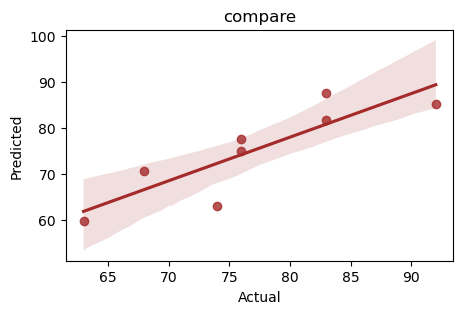

In [109]:
plt.figure(figsize=(5,3))
sns.regplot(x=compare['Actual'], y=compare['Predicted'], color='brown')
plt.title('compare')
plt.show()